In [1]:
from utils.input_output import Inputs
from utils.packages import *

In [2]:
inputs = Inputs('./input', 'train.csv', 'test.csv')
inputs.load_all_df()

Reading 1460 rows and 81 columns from ./input/train.csv.
Reading 1459 rows and 80 columns from ./input/test.csv.


In [3]:
df = inputs.data_dict['train']
df_test = inputs.data_dict['test']

In [4]:
set(df.columns) - set(df_test.columns)

{'SalePrice'}

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
num_cols = []
str_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        str_cols.append(col)
    else:
        num_cols.append(col)

In [7]:
df[num_cols].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

(array([ 42.,   0.,   6.,  31.,  25.,  34., 112., 205., 475., 252., 136.,
         77.,  37.,  14.,   7.,   5.,   0.,   0.,   0.,   2.]),
 array([3.04452244, 3.17960648, 3.31469051, 3.44977455, 3.58485859,
        3.71994263, 3.85502666, 3.9901107 , 4.12519474, 4.26027878,
        4.39536281, 4.53044685, 4.66553089, 4.80061493, 4.93569896,
        5.070783  , 5.20586704, 5.34095108, 5.47603512, 5.61111915,
        5.74620319]),
 <BarContainer object of 20 artists>)

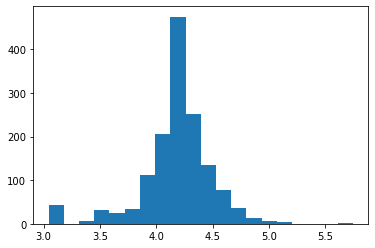

In [8]:
def log_transform(df, col, change_inplace=False):
    s = np.log(df[col])
    if s.isnull().sum() > 0:
        s = np.where(s.isnull(), s.mean(), s)
    if change_inplace:
        df[col] = s
    return s
    
plt.hist(log_transform(df, 'LotFrontage'), bins=20)

In [9]:
log_transform(df, 'LotFrontage', True)

array([4.17438727, 4.38202663, 4.21950771, ..., 4.18965474, 4.21950771,
       4.31748811])

In [10]:
df.LotFrontage

0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1455    4.127134
1456    4.442651
1457    4.189655
1458    4.219508
1459    4.317488
Name: LotFrontage, Length: 1460, dtype: float64

<AxesSubplot:>

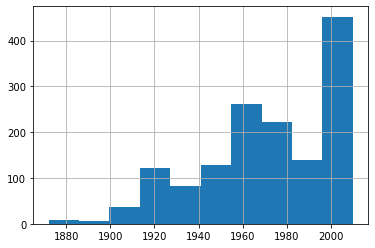

In [11]:
df.YearBuilt.hist()

In [12]:
2011 - df.YearBuilt

0        8
1       35
2       10
3       96
4       11
        ..
1455    12
1456    33
1457    70
1458    61
1459    46
Name: YearBuilt, Length: 1460, dtype: int64

In [18]:
df_describe = df[num_cols].describe().T

In [38]:
df_describe

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1460.0,4.191049,0.319974,3.044522,4.094345,4.191049,4.369448,5.746203
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [51]:
a = np.diag((1,2,3))
a

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [56]:
b = np.random.random((3,3))
b

array([[0.4633866 , 0.0838653 , 0.06345902],
       [0.16963537, 0.4905408 , 0.50725884],
       [0.79633486, 0.00776503, 0.10606538]])

In [57]:
a*b

array([[0.4633866 , 0.        , 0.        ],
       [0.        , 0.98108161, 0.        ],
       [0.        , 0.        , 0.31819613]])

In [58]:
a @ b

array([[0.4633866 , 0.0838653 , 0.06345902],
       [0.33927074, 0.98108161, 1.01451769],
       [2.38900457, 0.02329509, 0.31819613]])

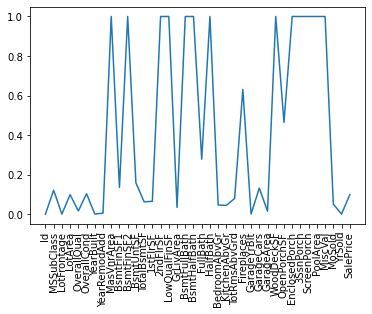

In [28]:
rel_diff = np.abs(df_describe['50%'] - df_describe['mean'])/df_describe['mean']
plt.plot(np.arange(len(rel_diff)), rel_diff)
plt.xticks(np.arange(len(rel_diff)), rel_diff.index, rotation=90)
plt.show()

In [32]:
rel_diff.dtype

dtype('float64')

In [36]:
rel_diff.shape

(38,)

In [35]:
rel_diff[rel_diff > 0.2]

Id               0.000000e+00
MSSubClass       1.212231e-01
LotFrontage      2.331150e-15
LotArea          9.873016e-02
OverallQual      1.628299e-02
OverallCond      1.031941e-01
YearBuilt        8.787197e-04
YearRemodAdd     4.601947e-03
MasVnrArea       1.000000e+00
BsmtFinSF1       1.355598e-01
BsmtFinSF2       1.000000e+00
BsmtUnfSF        1.582052e-01
TotalBsmtSF      6.234879e-02
1stFlrSF         6.504815e-02
2ndFlrSF         1.000000e+00
LowQualFinSF     1.000000e+00
GrLivArea        3.395904e-02
BsmtFullBath     1.000000e+00
BsmtHalfBath     1.000000e+00
FullBath         2.778993e-01
HalfBath         1.000000e+00
BedroomAbvGr     4.659498e-02
KitchenAbvGr     4.450262e-02
TotRmsAbvGrd     7.944515e-02
Fireplaces       6.312849e-01
GarageYrBlt      7.550323e-04
GarageCars       1.317829e-01
GarageArea       1.484177e-02
WoodDeckSF       1.000000e+00
OpenPorchSF      4.642123e-01
EnclosedPorch    1.000000e+00
3SsnPorch        1.000000e+00
ScreenPorch      1.000000e+00
PoolArea  

In [60]:
df.PoolArea.describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [13]:
df[str_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [64]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [75]:
df[str_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [81]:
df[str_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [83]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
# hw 1:
# numerical columns transformation
# hw 2:
# box plots for Alley and other categorical columns